## General data fetching

In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json


Bad key "text.kerning_factor" on line 4 in
C:\Users\ansni\anaconda3\envs\IDS\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def fetch_data(start, end):
    response = requests.get('https://tie.digitraffic.fi/api/v1/data/tms-data')
    return response.json()
def fetch_stations():
    response = requests.get('https://tie.digitraffic.fi/api/v3/metadata/tms-stations')
    stations = json_normalize(response.json()["features"])
    return stations

def fetch_sensors():
    response = requests.get('https://tie.digitraffic.fi/api/v3/metadata/tms-sensors')
    sensors = json_normalize(response.json()["roadStationSensors"])
    return sensors

In [3]:
stations = fetch_stations()

C:\Users\ansni\AppData\Local\Temp/ipykernel_10252/619273016.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  stations = json_normalize(response.json()["features"])


In [4]:
helsinki = stations[stations['properties.municipality']=='Helsinki']

In [5]:
import plotly.express as px
coords = pd.DataFrame(helsinki['geometry.coordinates'].to_list(), columns=['lon','lat', 'z'])
fig = px.scatter_mapbox(coords, lat="lat", lon="lon")
fig.update_layout(mapbox_style="open-street-map")
fig.show()

## Fetch data from a specific TMS station

In [6]:
helsinki.columns

Index(['type', 'id', 'geometry.type', 'geometry.coordinates',
       'properties.roadStationId', 'properties.tmsNumber', 'properties.name',
       'properties.collectionInterval', 'properties.collectionStatus',
       'properties.municipality', 'properties.municipalityCode',
       'properties.province', 'properties.provinceCode', 'properties.names.fi',
       'properties.names.sv', 'properties.names.en',
       'properties.roadAddress.roadNumber',
       'properties.roadAddress.roadSection',
       'properties.roadAddress.distanceFromRoadSectionStart',
       'properties.roadAddress.carriagewayCode',
       'properties.roadAddress.roadMaintenanceClass',
       'properties.roadAddress.contractArea',
       'properties.roadAddress.contractAreaCode',
       'properties.roadAddress.carriageway', 'properties.liviId',
       'properties.country', 'properties.startTime',
       'properties.repairMaintenanceTime', 'properties.annualMaintenanceTime',
       'properties.state', 'properties.purp

In [7]:
station = helsinki.iloc[0]
print(station.id)

23011


In [8]:
res = requests.get('https://tie.digitraffic.fi/api/v1/data/tms-data/23011')
a = json_normalize(res.json()["tmsStations"])
# print(a["sensorValues"])
a.head()

C:\Users\ansni\AppData\Local\Temp/ipykernel_10252/3376675275.py:2: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



,id,tmsNumber,measuredTime,sensorValues
0,23011,11,2021-10-06T13:43:32Z,"[{'id': 5054, 'roadStationId': 23011, 'name': ..."


In [9]:
b = pd.json_normalize(a.sensorValues[0])
b

,id,roadStationId,name,oldName,shortName,sensorValue,sensorUnit,timeWindowStart,timeWindowEnd,measuredTime
0,5054,23011,OHITUKSET_60MIN_KIINTEA_SUUNTA1,ohitukset_60min_kiintea_suunta1,kpl/h1,2023.0,kpl/h,2021-10-06T12:00:00Z,2021-10-06T13:00:00Z,2021-10-06T13:43:32Z
1,5055,23011,OHITUKSET_60MIN_KIINTEA_SUUNTA2,ohitukset_60min_kiintea_suunta2,kpl/h2,2334.0,kpl/h,2021-10-06T12:00:00Z,2021-10-06T13:00:00Z,2021-10-06T13:43:32Z
2,5056,23011,KESKINOPEUS_60MIN_KIINTEA_SUUNTA1,keskinopeus_60min_kiintea_suunta1,km/h1,49.0,km/h,2021-10-06T12:00:00Z,2021-10-06T13:00:00Z,2021-10-06T13:43:32Z
3,5057,23011,KESKINOPEUS_60MIN_KIINTEA_SUUNTA2,keskinopeus_60min_kiintea_suunta2,km/h2,55.0,km/h,2021-10-06T12:00:00Z,2021-10-06T13:00:00Z,2021-10-06T13:43:32Z
4,5058,23011,KESKINOPEUS_5MIN_KIINTEA_SUUNTA1_VVAPAAS1,keskinopeus_5min_kiintea_suunta1_VVAPAAS1,LTil1,75.0,***,2021-10-06T13:35:00Z,2021-10-06T13:40:00Z,2021-10-06T13:43:32Z
5,5061,23011,KESKINOPEUS_5MIN_KIINTEA_SUUNTA2_VVAPAAS2,keskinopeus_5min_kiintea_suunta2_VVAPAAS2,LTil2,89.0,***,2021-10-06T13:35:00Z,2021-10-06T13:40:00Z,2021-10-06T13:43:32Z
6,5064,23011,OHITUKSET_5MIN_KIINTEA_SUUNTA1_MS1,ohitukset_5min_kiintea_suunta1_MS1,MTil1,67.0,***,2021-10-06T13:35:00Z,2021-10-06T13:40:00Z,2021-10-06T13:43:32Z
7,5067,23011,OHITUKSET_60MIN_KIINTEA_SUUNTA1_MS1,ohitukset_60min_kiintea_suunta1_MS1,MTil1,63.0,***,2021-10-06T12:00:00Z,2021-10-06T13:00:00Z,2021-10-06T13:43:32Z
8,5068,23011,OHITUKSET_5MIN_KIINTEA_SUUNTA2_MS2,ohitukset_5min_kiintea_suunta2_MS2,MTil2,72.0,***,2021-10-06T13:35:00Z,2021-10-06T13:40:00Z,2021-10-06T13:43:32Z
9,5071,23011,OHITUKSET_60MIN_KIINTEA_SUUNTA2_MS2,ohitukset_60min_kiintea_suunta2_MS2,MTil2,73.0,***,2021-10-06T12:00:00Z,2021-10-06T13:00:00Z,2021-10-06T13:43:32Z


## Fetch historic TMS data

All the documentation needed to understand the raw data can be found [here](https://vayla.fi/en/transport-network/data/open-data/road-network/tms-data).

The result file is a CSV file separated by semicolons (;). The time is the current time in Finland, EET or EEST in the summertime. The CSV files include the following fields (unit in parentheses):
- TMS point id
- year
- päivän järjestysnumero (day of the year --> doy)
- hour
- minute
- second
- 1/100 second
- length (m)
- lane
- direction
- vehicle class
- speed(km/h)
- faulty (0 = validi record, 1=faulty record)
- total time (technical)
- time interval (technical)
- queue start (technical)

In [10]:
colnames= ["TMS point id", "year", "doy", "hour", "minute", "second", "1/100 second", "length (m)", "lane", "direction",
"vehicle class", "speed(km/h)", "faulty (0 = validi record, 1=faulty record)", "total time (technical)", "time interval (technical)", "queue start (technical)"]

In [11]:
year = 2017
ELY = "01" # Centres for Economic Development, Transport and the Environment (defines region e.g. 01 == Uusima)
lam_id = 101 # lam (FI) == TMS (EN), TMS point id
yearshort = 17  # two last digits of the year number
day_number = 32 # the day count number (1-365). 1.1. = 1

raw_data = pd.read_csv(f'https://aineistot.liikennevirasto.fi/lam/rawdata/{year}/{ELY}/lamraw_{lam_id}_{yearshort}_{day_number}.csv', names=colnames, sep=";")
raw_data.head()

,TMS point id,year,doy,hour,minute,second,1/100 second,length (m),lane,direction,vehicle class,speed(km/h),"faulty (0 = validi record, 1=faulty record)",total time (technical),time interval (technical),queue start (technical)
0,101,17,32,0,0,21,99,3.6,5,2,1,82,0,2199,-2,0
1,101,17,32,0,0,23,99,4.4,5,2,1,79,0,2399,184,0
2,101,17,32,0,0,36,99,4.2,5,2,1,91,0,3699,1279,0
3,101,17,32,0,0,44,99,3.6,5,2,1,73,0,4499,783,0
4,101,17,32,0,0,44,99,3.6,2,1,1,82,0,4499,-2,0


In [12]:
# Add a time column
raw_data["time"] = pd.to_datetime(raw_data['hour'].astype(str) + ':' + raw_data['minute'].astype(str)+ ':' + raw_data['second'].astype(str), format='%H:%M:%S')#.dt.time

# Process the year column to the actual number (make sure to run only once)
if raw_data.year[0] < 100:
    raw_data.year += 2000

# Get date for datetime

raw_data["date"] = pd.to_datetime(raw_data['year'] * 1000+ raw_data['doy'], format='%Y%j')
# raw_data["datetime"] = pd.to_datetime(raw_data['date'] + ' ' + raw_data['time'], format='%Y%M%D %H:%M:%S')
# raw_data["datetime"] = raw_data['date'] + ' ' + raw_data['time']
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71791 entries, 0 to 71790
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   TMS point id                                 71791 non-null  int64         
 1   year                                         71791 non-null  int64         
 2   doy                                          71791 non-null  int64         
 3   hour                                         71791 non-null  int64         
 4   minute                                       71791 non-null  int64         
 5   second                                       71791 non-null  int64         
 6   1/100 second                                 71791 non-null  int64         
 7   length (m)                                   71791 non-null  float64       
 8   lane                                         71791 non-null  int64         


C:\Users\ansni\AppData\Local\Temp/ipykernel_10252/3646850813.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



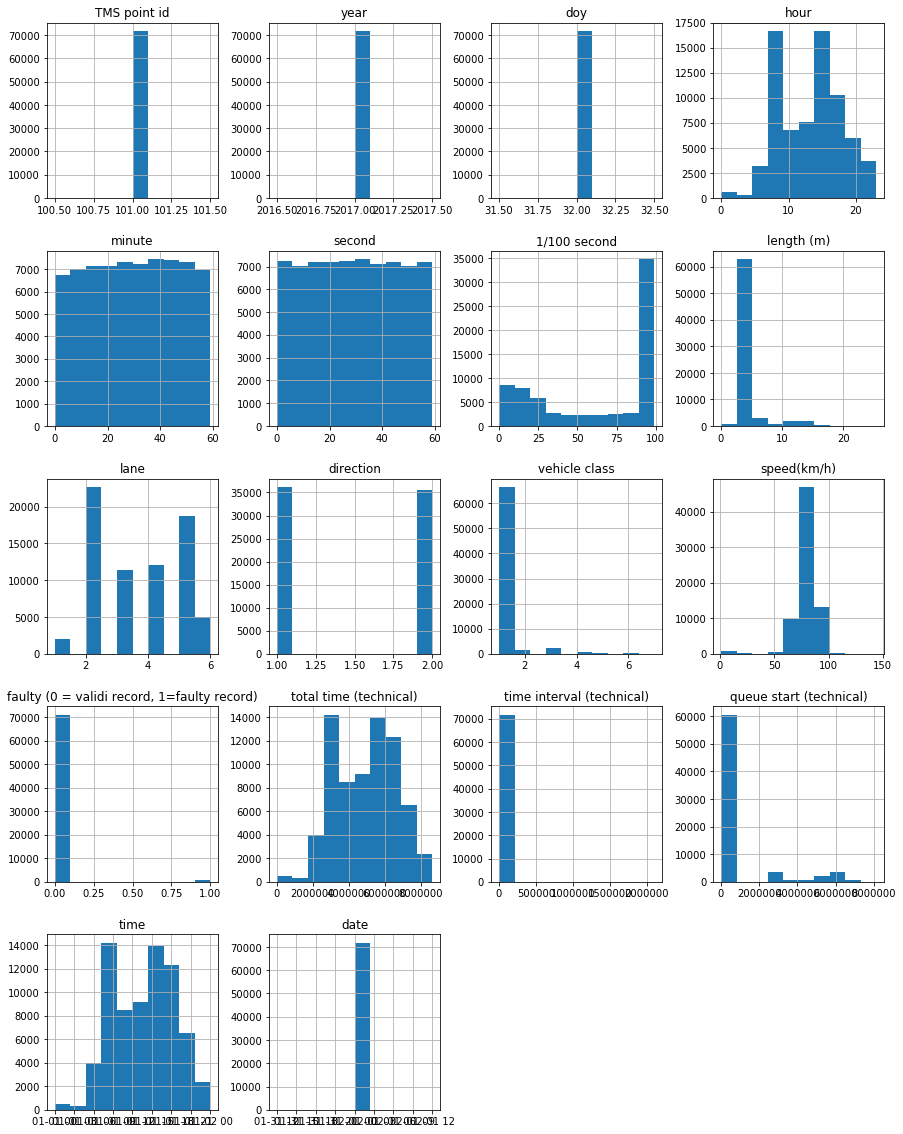

In [13]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
raw_data.hist(ax = ax);

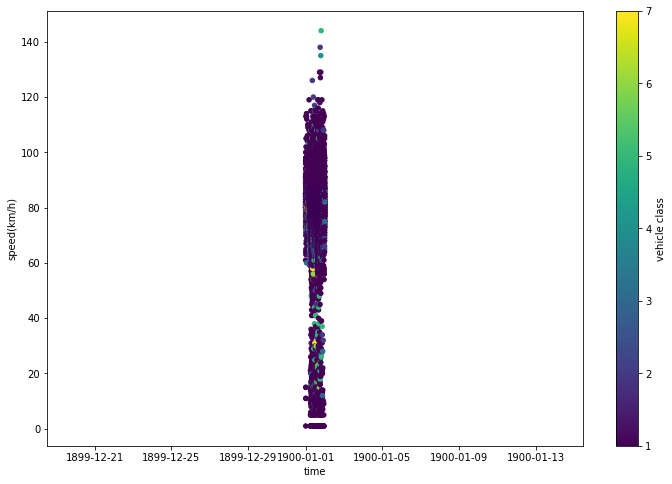

In [14]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca()
raw_data.plot.scatter(ax=ax, x="time", y="speed(km/h)", c="vehicle class", colormap='viridis')
# raw_data.plot(ax=ax, x=raw_data["time"])

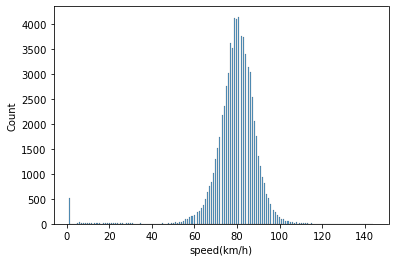

In [15]:
sns.histplot(x="speed(km/h)", data=raw_data)

It's kind of strange how there a very small number of measurements that shows the vehicles as stopped. Based on the 2nd to last plot, this seems to occur in most hours. It could be that in this station there is a traffic light that is causing the vehicles to stop. We should investigate where this TMS station is.

Let's plot the scatter plot again without those outliers.

C:\Users\ansni\AppData\Local\Temp/ipykernel_10252/1163644223.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



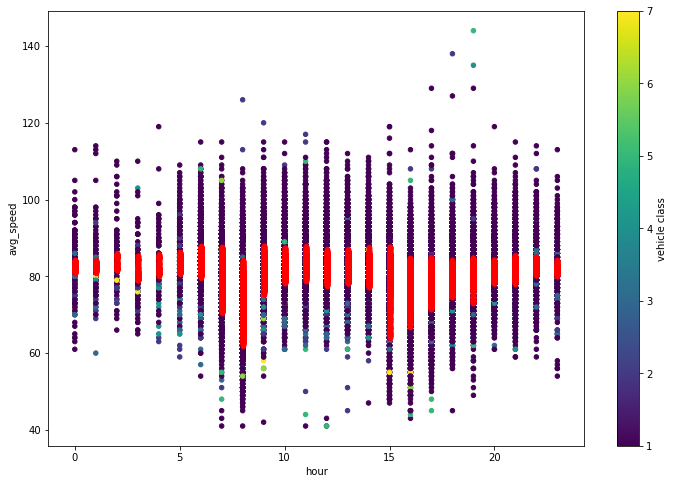

In [16]:
only_moving_data = raw_data[raw_data["speed(km/h)"]>40]
only_moving_data["avg_speed"] = only_moving_data["speed(km/h)"].rolling(50).mean()

fig = plt.figure(figsize = (12, 8))
ax = fig.gca()
only_moving_data.plot.scatter(ax=ax, x="hour", y="speed(km/h)", c="vehicle class", colormap='viridis')
only_moving_data.plot.scatter(ax=ax, x="hour", y="avg_speed", c="red")

In [17]:
only_moving_data["time"][:-10]

0       1900-01-01 00:00:21
1       1900-01-01 00:00:23
2       1900-01-01 00:00:36
3       1900-01-01 00:00:44
4       1900-01-01 00:00:44
                ...        
71776   1900-01-01 23:58:32
71777   1900-01-01 23:58:35
71778   1900-01-01 23:58:43
71779   1900-01-01 23:58:48
71780   1900-01-01 23:58:51
Name: time, Length: 70868, dtype: datetime64[ns]

C:\Users\ansni\AppData\Local\Temp/ipykernel_10252/319404152.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



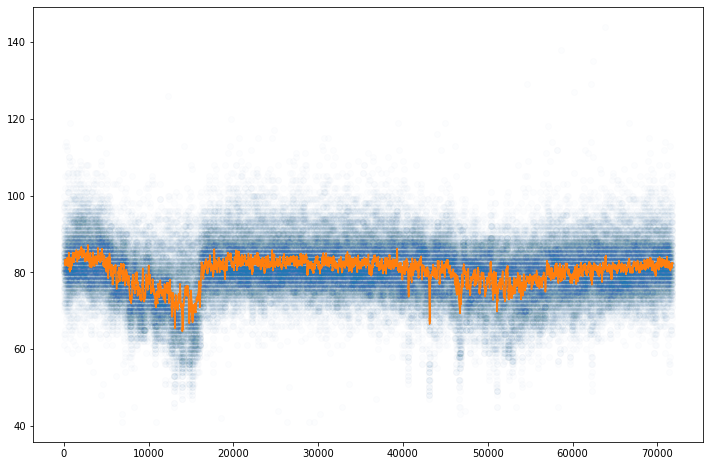

In [18]:
# only_moving_data.plot.scatter(ax=ax, x="index", y="speed(km/h)", c="vehicle class", colormap='viridis')
only_moving_data["speed_avg"] = only_moving_data["speed(km/h)"].rolling(100).mean()
# ax = plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))
# ax.set_xticks(range(len(only_moving_data)))
# ax.set_xticklabels(only_moving_data["hour"])
plt.plot(only_moving_data["speed(km/h)"], 'o', alpha=0.01)
plt.plot(only_moving_data["speed_avg"])

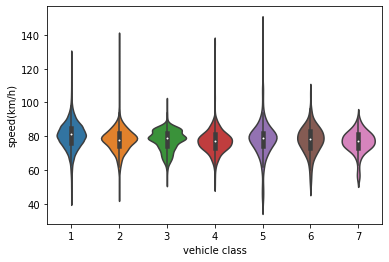

In [19]:
sns.violinplot(x="vehicle class", y="speed(km/h)", data=only_moving_data)

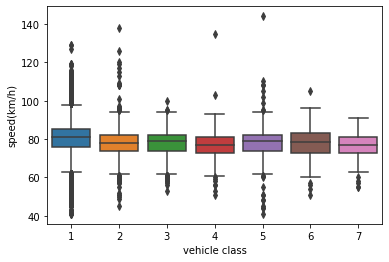

In [20]:
sns.boxplot(x="vehicle class", y="speed(km/h)", data=only_moving_data)


In [7]:
import pandas as pd
# file = open('101_kt51_Hanasaari_20200201_20200229.xls', 'r')
# report = pd.read_excel(file.read())
# report = pd.read_excel(r'108_vt3_Karhunkorpi_20201201_20201231.xls', engine='xlrd')
# report = pd.read_html('108_vt3_Karhunkorpi_20201201_20201231.xls')
with open(r'108_vt3_Karhunkorpi_20201201_20201231.csv', 'rb') as f:
  contents = f.read()
report = pd.read_csv(contents)

OSError: Expected file path name or file-like object, got <class 'bytes'> type

In [14]:
report = pd.read_csv('131_kt45_Helsinki_Tuomarinkartano_20200201_20200229.xls',sep=';', encoding='utf-16')
report

,Mittauspiste Sijainti Päivä Suuntakoodi Ajoneuvoluokka,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,KLO_00-01,KLO_01-02,KLO_02-03,KLO_03-04,KLO_04-05,...,KLO_14-15,KLO_15-16,KLO_16-17,KLO_17-18,KLO_18-19,KLO_19-20,KLO_20-21,KLO_21-22,KLO_22-23,KLO_23-00
0,131,kt45_Helsinki_Tuomarinkartano,01.02.2020,1,11 HA-PA,343,216,194,212,301,...,2172,2182,1890,1631,1372,1139,908,802,683,474
1,131,kt45_Helsinki_Tuomarinkartano,01.02.2020,1,12 KAIP,5,6,9,7,10,...,14,13,12,13,9,9,6,5,2,3
2,131,kt45_Helsinki_Tuomarinkartano,01.02.2020,1,13 Linja-autot,5,4,,1,1,...,7,4,6,4,5,8,4,4,5,4
3,131,kt45_Helsinki_Tuomarinkartano,01.02.2020,1,14 KAPP,5,6,2,2,2,...,11,8,5,7,3,6,4,8,6,4
4,131,kt45_Helsinki_Tuomarinkartano,01.02.2020,1,15 KATP,1,,,,,...,,,,,2,,,2,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,131,kt45_Helsinki_Tuomarinkartano,29.02.2020,2,13 Linja-autot,8,2,1,3,1,...,6,6,3,5,2,5,7,4,2,4
402,131,kt45_Helsinki_Tuomarinkartano,29.02.2020,2,14 KAPP,6,4,3,4,6,...,12,9,8,5,1,10,6,7,4,3
403,131,kt45_Helsinki_Tuomarinkartano,29.02.2020,2,15 KATP,,,1,,,...,,4,3,,,,1,1,,
404,131,kt45_Helsinki_Tuomarinkartano,29.02.2020,2,16 HA + PK,,,,,,...,10,8,3,3,1,4,2,1,3,


In [16]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 29 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0    Mittauspiste Sijainti Päivä Suuntakoodi Ajoneuvoluokka  406 non-null    int64 
 1   Unnamed: 1                                               406 non-null    object
 2   Unnamed: 2                                               406 non-null    object
 3   Unnamed: 3                                               406 non-null    int64 
 4   Unnamed: 4                                               406 non-null    object
 5    KLO_00-01                                               406 non-null    object
 6    KLO_01-02                                               406 non-null    object
 7    KLO_02-03                                               406 non-null    object
 8    KLO_03-04                              

In [17]:
report.columns

Index([' Mittauspiste Sijainti Päivä Suuntakoodi Ajoneuvoluokka', 'Unnamed: 1',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', ' KLO_00-01', ' KLO_01-02',
       ' KLO_02-03', ' KLO_03-04', ' KLO_04-05', ' KLO_05-06', ' KLO_06-07',
       ' KLO_07-08', ' KLO_08-09', ' KLO_09-10', ' KLO_10-11', ' KLO_11-12',
       ' KLO_12-13', ' KLO_13-14', ' KLO_14-15', ' KLO_15-16', ' KLO_16-17',
       ' KLO_17-18', ' KLO_18-19', ' KLO_19-20', ' KLO_20-21', ' KLO_21-22',
       ' KLO_22-23', ' KLO_23-00'],
      dtype='object')

In [18]:
report.fillna(0, inplace=True)
report


,Mittauspiste Sijainti Päivä Suuntakoodi Ajoneuvoluokka,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,KLO_00-01,KLO_01-02,KLO_02-03,KLO_03-04,KLO_04-05,...,KLO_14-15,KLO_15-16,KLO_16-17,KLO_17-18,KLO_18-19,KLO_19-20,KLO_20-21,KLO_21-22,KLO_22-23,KLO_23-00
0,131,kt45_Helsinki_Tuomarinkartano,01.02.2020,1,11 HA-PA,343,216,194,212,301,...,2172,2182,1890,1631,1372,1139,908,802,683,474
1,131,kt45_Helsinki_Tuomarinkartano,01.02.2020,1,12 KAIP,5,6,9,7,10,...,14,13,12,13,9,9,6,5,2,3
2,131,kt45_Helsinki_Tuomarinkartano,01.02.2020,1,13 Linja-autot,5,4,,1,1,...,7,4,6,4,5,8,4,4,5,4
3,131,kt45_Helsinki_Tuomarinkartano,01.02.2020,1,14 KAPP,5,6,2,2,2,...,11,8,5,7,3,6,4,8,6,4
4,131,kt45_Helsinki_Tuomarinkartano,01.02.2020,1,15 KATP,1,,,,,...,,,,,2,,,2,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,131,kt45_Helsinki_Tuomarinkartano,29.02.2020,2,13 Linja-autot,8,2,1,3,1,...,6,6,3,5,2,5,7,4,2,4
402,131,kt45_Helsinki_Tuomarinkartano,29.02.2020,2,14 KAPP,6,4,3,4,6,...,12,9,8,5,1,10,6,7,4,3
403,131,kt45_Helsinki_Tuomarinkartano,29.02.2020,2,15 KATP,,,1,,,...,,4,3,,,,1,1,,
404,131,kt45_Helsinki_Tuomarinkartano,29.02.2020,2,16 HA + PK,,,,,,...,10,8,3,3,1,4,2,1,3,


In [22]:
report.replace(' ', 0, inplace=True)
report

,Mittauspiste Sijainti Päivä Suuntakoodi Ajoneuvoluokka,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,KLO_00-01,KLO_01-02,KLO_02-03,KLO_03-04,KLO_04-05,...,KLO_14-15,KLO_15-16,KLO_16-17,KLO_17-18,KLO_18-19,KLO_19-20,KLO_20-21,KLO_21-22,KLO_22-23,KLO_23-00
0,131,kt45_Helsinki_Tuomarinkartano,01.02.2020,1,11 HA-PA,343,216,194,212,301,...,2172,2182,1890,1631,1372,1139,908,802,683,474
1,131,kt45_Helsinki_Tuomarinkartano,01.02.2020,1,12 KAIP,5,6,9,7,10,...,14,13,12,13,9,9,6,5,2,3
2,131,kt45_Helsinki_Tuomarinkartano,01.02.2020,1,13 Linja-autot,5,4,0,1,1,...,7,4,6,4,5,8,4,4,5,4
3,131,kt45_Helsinki_Tuomarinkartano,01.02.2020,1,14 KAPP,5,6,2,2,2,...,11,8,5,7,3,6,4,8,6,4
4,131,kt45_Helsinki_Tuomarinkartano,01.02.2020,1,15 KATP,1,0,0,0,0,...,0,0,0,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,131,kt45_Helsinki_Tuomarinkartano,29.02.2020,2,13 Linja-autot,8,2,1,3,1,...,6,6,3,5,2,5,7,4,2,4
402,131,kt45_Helsinki_Tuomarinkartano,29.02.2020,2,14 KAPP,6,4,3,4,6,...,12,9,8,5,1,10,6,7,4,3
403,131,kt45_Helsinki_Tuomarinkartano,29.02.2020,2,15 KATP,0,0,1,0,0,...,0,4,3,0,0,0,1,1,0,0
404,131,kt45_Helsinki_Tuomarinkartano,29.02.2020,2,16 HA + PK,0,0,0,0,0,...,10,8,3,3,1,4,2,1,3,0


In [72]:
report[' KLO_02-03'] = pd.to_numeric(report[' KLO_02-03'])
report[' KLO_01-02'] = pd.to_numeric(report[' KLO_01-02'])
report[' KLO_11-12'] = pd.to_numeric(report[' KLO_11-12'])
report[' KLO_16-17'] = pd.to_numeric(report[' KLO_16-17'])

In [77]:
report.columns

Index([' Mittauspiste Sijainti Päivä Suuntakoodi Ajoneuvoluokka', 'Unnamed: 1',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', ' KLO_00-01', ' KLO_01-02',
       ' KLO_02-03', ' KLO_03-04', ' KLO_04-05', ' KLO_05-06', ' KLO_06-07',
       ' KLO_07-08', ' KLO_08-09', ' KLO_09-10', ' KLO_10-11', ' KLO_11-12',
       ' KLO_12-13', ' KLO_13-14', ' KLO_14-15', ' KLO_15-16', ' KLO_16-17',
       ' KLO_17-18', ' KLO_18-19', ' KLO_19-20', ' KLO_20-21', ' KLO_21-22',
       ' KLO_22-23', ' KLO_23-00'],
      dtype='object')

Unnamed: 4
11 HA-PA          AxesSubplot(0.125,0.125;0.775x0.755)
12 KAIP           AxesSubplot(0.125,0.125;0.775x0.755)
13 Linja-autot    AxesSubplot(0.125,0.125;0.775x0.755)
14 KAPP           AxesSubplot(0.125,0.125;0.775x0.755)
15 KATP           AxesSubplot(0.125,0.125;0.775x0.755)
16 HA + PK        AxesSubplot(0.125,0.125;0.775x0.755)
17 HA + AV        AxesSubplot(0.125,0.125;0.775x0.755)
Name:  KLO_01-02, dtype: object

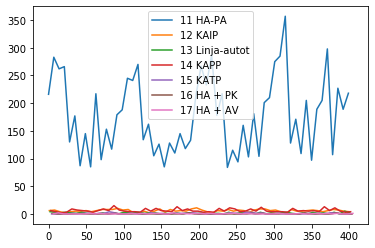

In [79]:
report.groupby(by=['Unnamed: 4'])[' KLO_01-02'].plot(legend=True)

Unnamed: 4
11 HA-PA          AxesSubplot(0.125,0.125;0.775x0.755)
12 KAIP           AxesSubplot(0.125,0.125;0.775x0.755)
13 Linja-autot    AxesSubplot(0.125,0.125;0.775x0.755)
14 KAPP           AxesSubplot(0.125,0.125;0.775x0.755)
15 KATP           AxesSubplot(0.125,0.125;0.775x0.755)
16 HA + PK        AxesSubplot(0.125,0.125;0.775x0.755)
17 HA + AV        AxesSubplot(0.125,0.125;0.775x0.755)
Name:  KLO_11-12, dtype: object

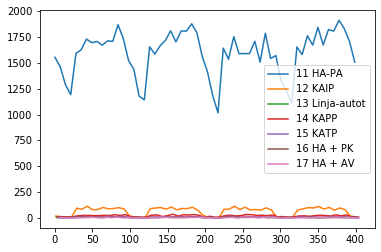

In [75]:
report.groupby(by=['Unnamed: 4'])[' KLO_11-12'].plot(legend=True)

Unnamed: 4      Unnamed: 3
11 HA-PA        1             AxesSubplot(0.125,0.125;0.775x0.755)
                2             AxesSubplot(0.125,0.125;0.775x0.755)
12 KAIP         1             AxesSubplot(0.125,0.125;0.775x0.755)
                2             AxesSubplot(0.125,0.125;0.775x0.755)
13 Linja-autot  1             AxesSubplot(0.125,0.125;0.775x0.755)
                2             AxesSubplot(0.125,0.125;0.775x0.755)
14 KAPP         1             AxesSubplot(0.125,0.125;0.775x0.755)
                2             AxesSubplot(0.125,0.125;0.775x0.755)
15 KATP         1             AxesSubplot(0.125,0.125;0.775x0.755)
                2             AxesSubplot(0.125,0.125;0.775x0.755)
16 HA + PK      1             AxesSubplot(0.125,0.125;0.775x0.755)
                2             AxesSubplot(0.125,0.125;0.775x0.755)
17 HA + AV      1             AxesSubplot(0.125,0.125;0.775x0.755)
                2             AxesSubplot(0.125,0.125;0.775x0.755)
Name:  KLO_16-17, dtype: object

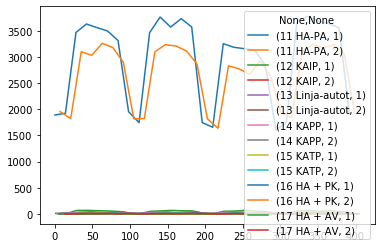

In [80]:
report.groupby(by=['Unnamed: 4', 'Unnamed: 3'])[' KLO_16-17'].plot(legend=True)

In [60]:
data = report.groupby(by=['Unnamed: 4'])[' KLO_01-02']
print(data)